In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
sys.path.append('../..')
from myfunctions_CNN import  EOG_1dcnn_cv
from myfunctions_dataloader import mydataloader_cv
from myfunctions_ensemble import ensemble
from myfunctions_doubleCNN import EOG_double1dcnn_cv
from myfunctions_LSTM import LSTM_ontop

In [2]:
d = mydataloader_cv()
Fs = 50
root = 'C:/Users/Javi/Documents/GitHub/TFM/'
d.load_data(path=root+'example_processed_data_v5', K=5, max_n_files=20)

 
There are less files than the provided maximum
shhs1-200001 loaded!
shhs1-200002 loaded!
shhs1-200003 loaded!
shhs1-200004 loaded!
shhs1-200005 loaded!
shhs1-200006 loaded!
shhs1-200007 loaded!
shhs1-200008 loaded!
shhs1-200009 loaded!
shhs1-200010 loaded!
shhs1-200011 loaded!
shhs1-200012 loaded!
shhs1-200013 loaded!
shhs1-200014 loaded!
shhs1-200015 loaded!
shhs1-200016 loaded!
shhs1-200017 loaded!
shhs1-200018 loaded!
shhs1-200019 loaded!
shhs1-200020 loaded!
Validation subjects in fold 0 [ 0  1 15 17]
Validation subjects in fold 1 [ 3  5  8 11]
Validation subjects in fold 2 [ 2 13 16 18]
Validation subjects in fold 3 [ 4  9 12 19]
Validation subjects in fold 4 [ 6  7 10 14]


In [3]:
savepath1 = root + '02_1DCNN_EOG/trained_models/v8_Adagrad/Fs2_20patients_Adagrad_balanced'
savepath2 = root + '02_1DCNN_EOG/trained_models/4Fs_20patients_cv5_bs500_e200_classweights/'
cnn1 = EOG_1dcnn_cv(input_dim=Fs/2, K=5, lr=0.0001, use_GPU=True, savepath=savepath1)
cnn2 = EOG_1dcnn_cv(input_dim=4*Fs, K=5, lr=0.0001, use_GPU=True, savepath=savepath2,
                     conv_size=6, maxpool_size=[4,2],input_stride=Fs/4)

ens = ensemble([cnn1,cnn2],[99,81],K=5,class_weights=[1,1,1,1,1],use_GPU=True)

Parameters: 10245


### Base ensemble training
Train one epoch so the CNN accuracy later is real

In [4]:
for k in range(d.K):
    print('##########################################################################################')
    print('          Starting fold %d' %k)
    print('##########################################################################################')
    ens.trainloop(d,k,1,batch_size=200)
print('DONE!')


##########################################################################################
          Starting fold 0
##########################################################################################
Parameters after loading: 10245
Epoch 1: 
	Training loss is 0.8242 and accuracy is 0.718.
	Validat  loss is 0.7886 and accuracy is 0.701.
	Elapsed time: 3.5 seconds
Done!
##########################################################################################
          Starting fold 1
##########################################################################################
Parameters after loading: 10245
Epoch 1: 
	Training loss is 0.7801 and accuracy is 0.716.
	Validat  loss is 0.8014 and accuracy is 0.698.
	Elapsed time: 1.5 seconds
Done!
##########################################################################################
          Starting fold 2
##########################################################################################
Parameters after loading: 10245
Ep

### LSTM training

In [5]:
lr = 5e-4
hidden_size = 500

savepath = root + '06_LSTM_ontop/trained_models/overensemble_Fs2Adagrad_4FsAdam_balanced_bestensemble'
mylstm = LSTM_ontop(ens,lr=lr,K=5,hidden_size=hidden_size,savepath=savepath) 
# by default, bidirectional, 2 layers, dropout 50%, Xavier initialization

Hidden size: 500
Input features size: 2048


##########################################################################################
          Starting fold 0
##########################################################################################
LSTM initial state loaded
Parameters after loading: 10245
Ensemble loaded
CNN accuracy over validation set: 0.632
Epoch 1: 
	Training loss is 6.8744 and accuracy is 0.187. Kappa -0.015.
	Validat  loss is 6.5346 and accuracy is 0.688. Kappa 0.582.
	Validation per-subject mean LSTM acc is 0.688.
	Elapsed time: 8.1 seconds
Epoch 2: 
	Training loss is 6.6063 and accuracy is 0.801. Kappa 0.726.
	Validat  loss is 6.3266 and accuracy is 0.689. Kappa 0.585.
	Validation per-subject mean LSTM acc is 0.689.
	Elapsed time: 8.3 seconds
Epoch 3: 
	Training loss is 6.3505 and accuracy is 0.800. Kappa 0.726.
	Validat  loss is 6.1519 and accuracy is 0.692. Kappa 0.593.
	Validation per-subject mean LSTM acc is 0.692.
	Elapsed time: 8.1 seconds
Epoch 4: 
	Training loss is 6.1484 and accuracy is 0.796

Epoch 39: 
	Training loss is 5.7388 and accuracy is 0.907. Kappa 0.869.
	Validat  loss is 6.1973 and accuracy is 0.732. Kappa 0.628.
	Validation per-subject mean LSTM acc is 0.732.
	Elapsed time: 15.6 seconds
Epoch 40: 
	Training loss is 5.7370 and accuracy is 0.909. Kappa 0.871.
	Validat  loss is 6.2058 and accuracy is 0.727. Kappa 0.622.
	Validation per-subject mean LSTM acc is 0.727.
	Elapsed time: 15.7 seconds
Epoch 41: 
	Training loss is 5.7321 and accuracy is 0.913. Kappa 0.877.
	Validat  loss is 6.2167 and accuracy is 0.728. Kappa 0.621.
	Validation per-subject mean LSTM acc is 0.728.
	Elapsed time: 15.5 seconds
Epoch 42: 
	Training loss is 5.7272 and accuracy is 0.916. Kappa 0.880.
	Validat  loss is 6.2167 and accuracy is 0.733. Kappa 0.627.
	Validation per-subject mean LSTM acc is 0.733.
	Elapsed time: 15.5 seconds
Epoch 43: 
	Training loss is 5.7251 and accuracy is 0.919. Kappa 0.885.
	Validat  loss is 6.2250 and accuracy is 0.728. Kappa 0.622.
	Validation per-subject mean LS

Epoch 16: 
	Training loss is 5.8518 and accuracy is 0.831. Kappa 0.765.
	Validat  loss is 6.1636 and accuracy is 0.722. Kappa 0.630.
	Validation per-subject mean LSTM acc is 0.722.
	Elapsed time: 15.5 seconds
Epoch 17: 
	Training loss is 5.8416 and accuracy is 0.839. Kappa 0.776.
	Validat  loss is 6.1618 and accuracy is 0.724. Kappa 0.634.
	Validation per-subject mean LSTM acc is 0.724.
	Elapsed time: 15.6 seconds
Epoch 18: 
	Training loss is 5.8335 and accuracy is 0.842. Kappa 0.780.
	Validat  loss is 6.1644 and accuracy is 0.725. Kappa 0.634.
	Validation per-subject mean LSTM acc is 0.725.
	Elapsed time: 15.5 seconds
Epoch 19: 
	Training loss is 5.8247 and accuracy is 0.848. Kappa 0.787.
	Validat  loss is 6.1817 and accuracy is 0.719. Kappa 0.627.
	Validation per-subject mean LSTM acc is 0.719.
	Elapsed time: 15.6 seconds
Epoch 20: 
	Training loss is 5.8180 and accuracy is 0.848. Kappa 0.788.
	Validat  loss is 6.1897 and accuracy is 0.716. Kappa 0.623.
	Validation per-subject mean LS

Epoch 56: 
	Training loss is 5.6816 and accuracy is 0.926. Kappa 0.893.
	Validat  loss is 6.3930 and accuracy is 0.721. Kappa 0.622.
	Validation per-subject mean LSTM acc is 0.721.
	Elapsed time: 15.4 seconds
Epoch 57: 
	Training loss is 5.6770 and accuracy is 0.935. Kappa 0.907.
	Validat  loss is 6.3969 and accuracy is 0.722. Kappa 0.624.
	Validation per-subject mean LSTM acc is 0.722.
	Elapsed time: 15.6 seconds
Epoch 58: 
	Training loss is 5.6755 and accuracy is 0.937. Kappa 0.908.
	Validat  loss is 6.4440 and accuracy is 0.702. Kappa 0.601.
	Validation per-subject mean LSTM acc is 0.702.
	Elapsed time: 15.5 seconds
Epoch 59: 
	Training loss is 5.6734 and accuracy is 0.931. Kappa 0.901.
	Validat  loss is 6.4448 and accuracy is 0.706. Kappa 0.605.
	Validation per-subject mean LSTM acc is 0.706.
	Elapsed time: 15.6 seconds
Epoch 60: 
	Training loss is 5.6695 and accuracy is 0.937. Kappa 0.909.
	Validat  loss is 6.4276 and accuracy is 0.720. Kappa 0.622.
	Validation per-subject mean LS

Epoch 33: 
	Training loss is 5.7612 and accuracy is 0.876. Kappa 0.825.
	Validat  loss is 6.2271 and accuracy is 0.732. Kappa 0.641.
	Validation per-subject mean LSTM acc is 0.732.
	Elapsed time: 15.5 seconds
Epoch 34: 
	Training loss is 5.7659 and accuracy is 0.870. Kappa 0.819.
	Validat  loss is 6.2200 and accuracy is 0.735. Kappa 0.646.
	Validation per-subject mean LSTM acc is 0.735.
	Elapsed time: 15.7 seconds
Epoch 35: 
	Training loss is 5.7479 and accuracy is 0.879. Kappa 0.830.
	Validat  loss is 6.2067 and accuracy is 0.742. Kappa 0.654.
	Validation per-subject mean LSTM acc is 0.742.
	Elapsed time: 15.5 seconds
Epoch 36: 
	Training loss is 5.7469 and accuracy is 0.885. Kappa 0.838.
	Validat  loss is 6.2265 and accuracy is 0.738. Kappa 0.649.
	Validation per-subject mean LSTM acc is 0.738.
	Elapsed time: 15.7 seconds
Epoch 37: 
	Training loss is 5.7425 and accuracy is 0.881. Kappa 0.833.
	Validat  loss is 6.2468 and accuracy is 0.731. Kappa 0.641.
	Validation per-subject mean LS

Epoch 10: 
	Training loss is 5.9559 and accuracy is 0.788. Kappa 0.712.
	Validat  loss is 6.0963 and accuracy is 0.715. Kappa 0.610.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 15.4 seconds
Epoch 11: 
	Training loss is 5.9354 and accuracy is 0.787. Kappa 0.711.
	Validat  loss is 6.0900 and accuracy is 0.733. Kappa 0.632.
	Validation per-subject mean LSTM acc is 0.733.
	Elapsed time: 15.6 seconds
Epoch 12: 
	Training loss is 5.9127 and accuracy is 0.792. Kappa 0.718.
	Validat  loss is 6.0884 and accuracy is 0.746. Kappa 0.649.
	Validation per-subject mean LSTM acc is 0.746.
	Elapsed time: 15.5 seconds
Epoch 13: 
	Training loss is 5.9001 and accuracy is 0.797. Kappa 0.724.
	Validat  loss is 6.0922 and accuracy is 0.755. Kappa 0.658.
	Validation per-subject mean LSTM acc is 0.755.
	Elapsed time: 15.4 seconds
Epoch 14: 
	Training loss is 5.8879 and accuracy is 0.803. Kappa 0.731.
	Validat  loss is 6.0962 and accuracy is 0.757. Kappa 0.658.
	Validation per-subject mean LS

Epoch 50: 
	Training loss is 5.7209 and accuracy is 0.892. Kappa 0.848.
	Validat  loss is 6.1602 and accuracy is 0.786. Kappa 0.690.
	Validation per-subject mean LSTM acc is 0.786.
	Elapsed time: 15.5 seconds
Epoch 51: 
	Training loss is 5.7187 and accuracy is 0.893. Kappa 0.849.
	Validat  loss is 6.2479 and accuracy is 0.775. Kappa 0.672.
	Validation per-subject mean LSTM acc is 0.775.
	Elapsed time: 15.6 seconds
Epoch 52: 
	Training loss is 5.7156 and accuracy is 0.900. Kappa 0.859.
	Validat  loss is 6.1803 and accuracy is 0.791. Kappa 0.695.
	Validation per-subject mean LSTM acc is 0.791.
	Elapsed time: 15.5 seconds
Epoch 53: 
	Training loss is 5.7123 and accuracy is 0.900. Kappa 0.859.
	Validat  loss is 6.2184 and accuracy is 0.785. Kappa 0.686.
	Validation per-subject mean LSTM acc is 0.785.
	Elapsed time: 15.5 seconds
Epoch 54: 
	Training loss is 5.7092 and accuracy is 0.902. Kappa 0.861.
	Validat  loss is 6.2556 and accuracy is 0.781. Kappa 0.680.
	Validation per-subject mean LS

Epoch 27: 
	Training loss is 5.8051 and accuracy is 0.849. Kappa 0.791.
	Validat  loss is 6.1899 and accuracy is 0.698. Kappa 0.590.
	Validation per-subject mean LSTM acc is 0.698.
	Elapsed time: 15.7 seconds
Epoch 28: 
	Training loss is 5.8010 and accuracy is 0.850. Kappa 0.792.
	Validat  loss is 6.1884 and accuracy is 0.702. Kappa 0.594.
	Validation per-subject mean LSTM acc is 0.702.
	Elapsed time: 15.8 seconds
Epoch 29: 
	Training loss is 5.7964 and accuracy is 0.853. Kappa 0.795.
	Validat  loss is 6.1866 and accuracy is 0.701. Kappa 0.593.
	Validation per-subject mean LSTM acc is 0.701.
	Elapsed time: 15.7 seconds
Epoch 30: 
	Training loss is 5.7925 and accuracy is 0.855. Kappa 0.798.
	Validat  loss is 6.1831 and accuracy is 0.703. Kappa 0.596.
	Validation per-subject mean LSTM acc is 0.703.
	Elapsed time: 15.4 seconds
Epoch 31: 
	Training loss is 5.7870 and accuracy is 0.858. Kappa 0.803.
	Validat  loss is 6.1789 and accuracy is 0.705. Kappa 0.598.
	Validation per-subject mean LS

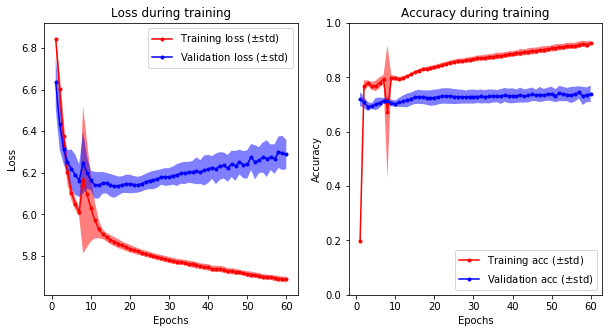

Epoch 56 has the highest validation accuracy (74.4 +- 2.3 %) with validation loss 6.266 +- 0.071. 
Epoch 15 has the lowest validation loss (6.134 +- 0.054) with accuracy 72.8 +- 2.6 %. 
Time taken to train (aprox): 1159.8 seconds.
Not all trainings have the same length, so the minimum length will be used
Epoch 15 validation kappa: 0.633 +- 0.030.
Not all trainings have the same length, so it is not possible to plot the results
COMPUTE CORRELATION!!!


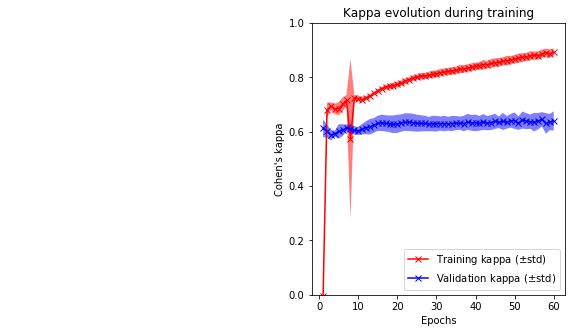

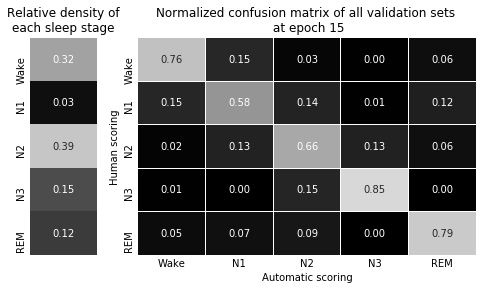

DONE!


In [8]:
epochs = 60
subjects_per_batch = 16

for k in range(d.K):
    print('##########################################################################################')
    print('          Starting fold %d' %k)
    print('##########################################################################################')
    mylstm.trainloop_persubject(d,k,epochs=epochs,subjects_per_batch=subjects_per_batch)
    mylstm.predict_all_validation_subjects(d,k)
mylstm.plot_training_information()
print('DONE!')

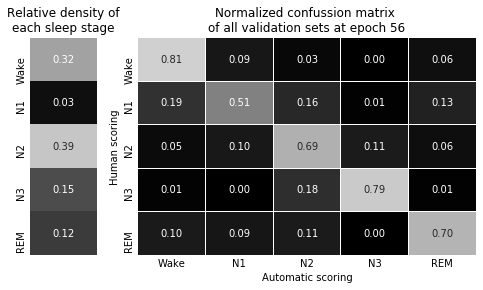

In [9]:
mylstm.plot_cm_at_epoch(56)

In [16]:
e = 56
acc = []; f1 = []; kappa = []

for k in range(d.K):
    acc.append(mylstm.valid_acc_during_training[k][e])
    f1.append(mylstm.valid_macrof1[k][e])
    kappa.append(mylstm.valid_kappa[k][e])
print('Acc',np.mean(acc),'+-',np.std(acc))
print('F1',np.mean(f1),'+-',np.std(f1))
print('Kappa',np.mean(kappa),'+-',np.std(kappa))

Acc 0.7443126839488932 +- 0.02301838627388157
F1 0.638154682408028 +- 0.03410303870663997
Kappa 0.6459508443875613 +- 0.02594512111309876


In [17]:
e = 15
acc = []; f1 = []; kappa = []

for k in range(d.K):
    acc.append(mylstm.valid_acc_during_training[k][e])
    f1.append(mylstm.valid_macrof1[k][e])
    kappa.append(mylstm.valid_kappa[k][e])
print('Acc',np.mean(acc),'+-',np.std(acc))
print('F1',np.mean(f1),'+-',np.std(f1))
print('Kappa',np.mean(kappa),'+-',np.std(kappa))

Acc 0.7284763947949353 +- 0.025928064543611306
F1 0.6399759295063259 +- 0.03343914709150978
Kappa 0.6326931967438365 +- 0.03019722160707871


# With FC
Also let's use a much longer train. Let's see if there is any overfitting (in terms of decreasing acc / F1 / kappa in validation).

In [26]:
savepath = root + '06_LSTM_ontop/trained_models/overensemble_Fs2Adagrad_4FsAdam_balanced_bestensemble_FC_longtrain'
mylstm = LSTM_ontop(ens,lr=lr,K=5,hidden_size=hidden_size,savepath=savepath, FC=True) 

Hidden size: 500
Input features size: 2048


##########################################################################################
          Starting fold 0
##########################################################################################
LSTM initial state loaded
Parameters after loading: 10245
Ensemble loaded
CNN accuracy over validation set: 0.632


C:\Users\Equipo\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1855: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


Epoch 1: 
	Training loss is 6.9492 and accuracy is 0.207. Kappa 0.004.
	Validat  loss is 7.2644 and accuracy is 0.509. Kappa 0.386.
	Validation per-subject mean LSTM acc is 0.509.
	Elapsed time: 8.1 seconds
Epoch 2: 
	Training loss is 8.0390 and accuracy is 0.565. Kappa 0.463.
	Validat  loss is 6.6916 and accuracy is 0.550. Kappa 0.433.
	Validation per-subject mean LSTM acc is 0.550.
	Elapsed time: 7.9 seconds
Epoch 3: 
	Training loss is 7.0544 and accuracy is 0.598. Kappa 0.497.
	Validat  loss is 6.5850 and accuracy is 0.606. Kappa 0.488.
	Validation per-subject mean LSTM acc is 0.606.
	Elapsed time: 8.0 seconds
Epoch 4: 
	Training loss is 6.5120 and accuracy is 0.695. Kappa 0.600.
	Validat  loss is 6.5402 and accuracy is 0.635. Kappa 0.516.
	Validation per-subject mean LSTM acc is 0.635.
	Elapsed time: 8.0 seconds
Epoch 5: 
	Training loss is 6.4339 and accuracy is 0.743. Kappa 0.655.
	Validat  loss is 6.3264 and accuracy is 0.655. Kappa 0.538.
	Validation per-subject mean LSTM acc is

Epoch 41: 
	Training loss is 5.7421 and accuracy is 0.924. Kappa 0.892.
	Validat  loss is 6.1657 and accuracy is 0.723. Kappa 0.617.
	Validation per-subject mean LSTM acc is 0.723.
	Elapsed time: 8.1 seconds
Epoch 42: 
	Training loss is 5.7378 and accuracy is 0.925. Kappa 0.893.
	Validat  loss is 6.1434 and accuracy is 0.728. Kappa 0.624.
	Validation per-subject mean LSTM acc is 0.728.
	Elapsed time: 8.0 seconds
Epoch 43: 
	Training loss is 5.7357 and accuracy is 0.926. Kappa 0.895.
	Validat  loss is 6.1897 and accuracy is 0.724. Kappa 0.617.
	Validation per-subject mean LSTM acc is 0.724.
	Elapsed time: 8.1 seconds
Epoch 44: 
	Training loss is 5.7339 and accuracy is 0.931. Kappa 0.902.
	Validat  loss is 6.1798 and accuracy is 0.724. Kappa 0.619.
	Validation per-subject mean LSTM acc is 0.724.
	Elapsed time: 7.9 seconds
Epoch 45: 
	Training loss is 5.7307 and accuracy is 0.929. Kappa 0.899.
	Validat  loss is 6.1948 and accuracy is 0.722. Kappa 0.614.
	Validation per-subject mean LSTM a

Epoch 81: 
	Training loss is 5.6686 and accuracy is 0.963. Kappa 0.946.
	Validat  loss is 6.3868 and accuracy is 0.718. Kappa 0.604.
	Validation per-subject mean LSTM acc is 0.718.
	Elapsed time: 7.8 seconds
Epoch 82: 
	Training loss is 5.6598 and accuracy is 0.965. Kappa 0.949.
	Validat  loss is 6.3435 and accuracy is 0.734. Kappa 0.624.
	Validation per-subject mean LSTM acc is 0.734.
	Elapsed time: 7.8 seconds
Epoch 83: 
	Training loss is 5.6636 and accuracy is 0.965. Kappa 0.949.
	Validat  loss is 6.3673 and accuracy is 0.726. Kappa 0.613.
	Validation per-subject mean LSTM acc is 0.726.
	Elapsed time: 7.9 seconds
Epoch 84: 
	Training loss is 5.6585 and accuracy is 0.968. Kappa 0.953.
	Validat  loss is 6.4327 and accuracy is 0.712. Kappa 0.596.
	Validation per-subject mean LSTM acc is 0.712.
	Elapsed time: 7.9 seconds
Epoch 85: 
	Training loss is 5.6647 and accuracy is 0.963. Kappa 0.947.
	Validat  loss is 6.3794 and accuracy is 0.727. Kappa 0.613.
	Validation per-subject mean LSTM a

Epoch 121: 
	Training loss is 5.6450 and accuracy is 0.981. Kappa 0.972.
	Validat  loss is 6.5310 and accuracy is 0.725. Kappa 0.608.
	Validation per-subject mean LSTM acc is 0.725.
	Elapsed time: 7.8 seconds
Epoch 122: 
	Training loss is 5.6442 and accuracy is 0.981. Kappa 0.972.
	Validat  loss is 6.4732 and accuracy is 0.732. Kappa 0.620.
	Validation per-subject mean LSTM acc is 0.732.
	Elapsed time: 7.8 seconds
Epoch 123: 
	Training loss is 5.6297 and accuracy is 0.978. Kappa 0.968.
	Validat  loss is 6.5185 and accuracy is 0.730. Kappa 0.617.
	Validation per-subject mean LSTM acc is 0.730.
	Elapsed time: 7.8 seconds
Epoch 124: 
	Training loss is 5.6273 and accuracy is 0.979. Kappa 0.969.
	Validat  loss is 6.5692 and accuracy is 0.729. Kappa 0.611.
	Validation per-subject mean LSTM acc is 0.729.
	Elapsed time: 7.8 seconds
Epoch 125: 
	Training loss is 5.6483 and accuracy is 0.981. Kappa 0.973.
	Validat  loss is 6.5587 and accuracy is 0.726. Kappa 0.609.
	Validation per-subject mean L

Epoch 161: 
	Training loss is 5.6101 and accuracy is 0.986. Kappa 0.979.
	Validat  loss is 6.6315 and accuracy is 0.728. Kappa 0.608.
	Validation per-subject mean LSTM acc is 0.728.
	Elapsed time: 7.8 seconds
Epoch 162: 
	Training loss is 5.6082 and accuracy is 0.990. Kappa 0.984.
	Validat  loss is 6.6770 and accuracy is 0.725. Kappa 0.606.
	Validation per-subject mean LSTM acc is 0.725.
	Elapsed time: 7.8 seconds
Epoch 163: 
	Training loss is 5.6059 and accuracy is 0.988. Kappa 0.982.
	Validat  loss is 6.6777 and accuracy is 0.727. Kappa 0.608.
	Validation per-subject mean LSTM acc is 0.727.
	Elapsed time: 7.8 seconds
Epoch 164: 
	Training loss is 5.6044 and accuracy is 0.990. Kappa 0.985.
	Validat  loss is 6.6936 and accuracy is 0.724. Kappa 0.605.
	Validation per-subject mean LSTM acc is 0.724.
	Elapsed time: 7.8 seconds
Epoch 165: 
	Training loss is 5.6067 and accuracy is 0.990. Kappa 0.985.
	Validat  loss is 6.6730 and accuracy is 0.726. Kappa 0.609.
	Validation per-subject mean L

Epoch 201: 
	Training loss is 5.5917 and accuracy is 0.996. Kappa 0.994.
	Validat  loss is 6.8431 and accuracy is 0.726. Kappa 0.604.
	Validation per-subject mean LSTM acc is 0.726.
	Elapsed time: 7.8 seconds
Epoch 202: 
	Training loss is 5.5920 and accuracy is 0.995. Kappa 0.992.
	Validat  loss is 6.8880 and accuracy is 0.718. Kappa 0.595.
	Validation per-subject mean LSTM acc is 0.718.
	Elapsed time: 7.8 seconds
Epoch 203: 
	Training loss is 5.5917 and accuracy is 0.995. Kappa 0.993.
	Validat  loss is 6.8216 and accuracy is 0.728. Kappa 0.607.
	Validation per-subject mean LSTM acc is 0.728.
	Elapsed time: 7.8 seconds
Epoch 204: 
	Training loss is 5.5918 and accuracy is 0.995. Kappa 0.993.
	Validat  loss is 6.8593 and accuracy is 0.724. Kappa 0.602.
	Validation per-subject mean LSTM acc is 0.724.
	Elapsed time: 7.8 seconds
Epoch 205: 
	Training loss is 5.5931 and accuracy is 0.995. Kappa 0.993.
	Validat  loss is 6.8558 and accuracy is 0.723. Kappa 0.600.
	Validation per-subject mean L

Epoch 241: 
	Training loss is 5.5914 and accuracy is 0.997. Kappa 0.995.
	Validat  loss is 6.9781 and accuracy is 0.723. Kappa 0.600.
	Validation per-subject mean LSTM acc is 0.723.
	Elapsed time: 7.8 seconds
Epoch 242: 
	Training loss is 5.5850 and accuracy is 0.997. Kappa 0.995.
	Validat  loss is 6.9486 and accuracy is 0.724. Kappa 0.602.
	Validation per-subject mean LSTM acc is 0.724.
	Elapsed time: 7.8 seconds
Epoch 243: 
	Training loss is 5.5862 and accuracy is 0.996. Kappa 0.994.
	Validat  loss is 6.9853 and accuracy is 0.722. Kappa 0.598.
	Validation per-subject mean LSTM acc is 0.722.
	Elapsed time: 7.8 seconds
Epoch 244: 
	Training loss is 5.5924 and accuracy is 0.997. Kappa 0.995.
	Validat  loss is 6.9682 and accuracy is 0.722. Kappa 0.599.
	Validation per-subject mean LSTM acc is 0.722.
	Elapsed time: 7.8 seconds
Epoch 245: 
	Training loss is 5.5844 and accuracy is 0.997. Kappa 0.995.
	Validat  loss is 6.9637 and accuracy is 0.722. Kappa 0.600.
	Validation per-subject mean L

Epoch 281: 
	Training loss is 5.6058 and accuracy is 0.996. Kappa 0.995.
	Validat  loss is 6.7243 and accuracy is 0.721. Kappa 0.596.
	Validation per-subject mean LSTM acc is 0.721.
	Elapsed time: 7.8 seconds
Epoch 282: 
	Training loss is 5.5980 and accuracy is 0.996. Kappa 0.994.
	Validat  loss is 6.7976 and accuracy is 0.716. Kappa 0.592.
	Validation per-subject mean LSTM acc is 0.716.
	Elapsed time: 7.8 seconds
Epoch 283: 
	Training loss is 5.5936 and accuracy is 0.995. Kappa 0.992.
	Validat  loss is 6.8219 and accuracy is 0.720. Kappa 0.597.
	Validation per-subject mean LSTM acc is 0.720.
	Elapsed time: 7.8 seconds
Epoch 284: 
	Training loss is 5.6010 and accuracy is 0.995. Kappa 0.993.
	Validat  loss is 6.7683 and accuracy is 0.727. Kappa 0.609.
	Validation per-subject mean LSTM acc is 0.727.
	Elapsed time: 7.8 seconds
Epoch 285: 
	Training loss is 5.5913 and accuracy is 0.996. Kappa 0.994.
	Validat  loss is 6.7231 and accuracy is 0.733. Kappa 0.618.
	Validation per-subject mean L

Epoch 18: 
	Training loss is 5.9086 and accuracy is 0.840. Kappa 0.777.
	Validat  loss is 6.2203 and accuracy is 0.695. Kappa 0.600.
	Validation per-subject mean LSTM acc is 0.695.
	Elapsed time: 7.8 seconds
Epoch 19: 
	Training loss is 5.8868 and accuracy is 0.845. Kappa 0.784.
	Validat  loss is 6.1802 and accuracy is 0.728. Kappa 0.638.
	Validation per-subject mean LSTM acc is 0.728.
	Elapsed time: 7.8 seconds
Epoch 20: 
	Training loss is 5.8809 and accuracy is 0.864. Kappa 0.809.
	Validat  loss is 6.1682 and accuracy is 0.728. Kappa 0.638.
	Validation per-subject mean LSTM acc is 0.728.
	Elapsed time: 7.8 seconds
Epoch 21: 
	Training loss is 5.8708 and accuracy is 0.865. Kappa 0.810.
	Validat  loss is 6.1680 and accuracy is 0.706. Kappa 0.613.
	Validation per-subject mean LSTM acc is 0.706.
	Elapsed time: 7.8 seconds
Epoch 22: 
	Training loss is 5.8447 and accuracy is 0.859. Kappa 0.802.
	Validat  loss is 6.1677 and accuracy is 0.716. Kappa 0.624.
	Validation per-subject mean LSTM a

Epoch 58: 
	Training loss is 5.7127 and accuracy is 0.935. Kappa 0.905.
	Validat  loss is 6.3129 and accuracy is 0.720. Kappa 0.624.
	Validation per-subject mean LSTM acc is 0.720.
	Elapsed time: 7.8 seconds
Epoch 59: 
	Training loss is 5.6992 and accuracy is 0.938. Kappa 0.910.
	Validat  loss is 6.2766 and accuracy is 0.743. Kappa 0.650.
	Validation per-subject mean LSTM acc is 0.743.
	Elapsed time: 7.8 seconds
Epoch 60: 
	Training loss is 5.7229 and accuracy is 0.931. Kappa 0.901.
	Validat  loss is 6.2799 and accuracy is 0.744. Kappa 0.652.
	Validation per-subject mean LSTM acc is 0.744.
	Elapsed time: 7.8 seconds
Epoch 61: 
	Training loss is 5.7202 and accuracy is 0.932. Kappa 0.901.
	Validat  loss is 6.3183 and accuracy is 0.722. Kappa 0.626.
	Validation per-subject mean LSTM acc is 0.722.
	Elapsed time: 7.8 seconds
Epoch 62: 
	Training loss is 5.6992 and accuracy is 0.940. Kappa 0.913.
	Validat  loss is 6.3300 and accuracy is 0.720. Kappa 0.623.
	Validation per-subject mean LSTM a

Epoch 98: 
	Training loss is 5.6967 and accuracy is 0.948. Kappa 0.925.
	Validat  loss is 6.4348 and accuracy is 0.701. Kappa 0.600.
	Validation per-subject mean LSTM acc is 0.701.
	Elapsed time: 7.8 seconds
Epoch 99: 
	Training loss is 5.6964 and accuracy is 0.939. Kappa 0.912.
	Validat  loss is 6.4820 and accuracy is 0.689. Kappa 0.586.
	Validation per-subject mean LSTM acc is 0.689.
	Elapsed time: 7.8 seconds
Epoch 100: 
	Training loss is 5.6786 and accuracy is 0.944. Kappa 0.919.
	Validat  loss is 6.4416 and accuracy is 0.715. Kappa 0.616.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 7.8 seconds
Epoch 101: 
	Training loss is 5.6712 and accuracy is 0.955. Kappa 0.934.
	Validat  loss is 6.3698 and accuracy is 0.745. Kappa 0.652.
	Validation per-subject mean LSTM acc is 0.745.
	Elapsed time: 7.8 seconds
Epoch 102: 
	Training loss is 5.6704 and accuracy is 0.961. Kappa 0.943.
	Validat  loss is 6.3564 and accuracy is 0.741. Kappa 0.646.
	Validation per-subject mean LST

Epoch 138: 
	Training loss is 5.6190 and accuracy is 0.975. Kappa 0.964.
	Validat  loss is 6.6072 and accuracy is 0.717. Kappa 0.616.
	Validation per-subject mean LSTM acc is 0.717.
	Elapsed time: 7.8 seconds
Epoch 139: 
	Training loss is 5.6161 and accuracy is 0.974. Kappa 0.962.
	Validat  loss is 6.6056 and accuracy is 0.717. Kappa 0.616.
	Validation per-subject mean LSTM acc is 0.717.
	Elapsed time: 7.8 seconds
Epoch 140: 
	Training loss is 5.6162 and accuracy is 0.976. Kappa 0.965.
	Validat  loss is 6.6086 and accuracy is 0.726. Kappa 0.626.
	Validation per-subject mean LSTM acc is 0.726.
	Elapsed time: 7.8 seconds
Epoch 141: 
	Training loss is 5.6139 and accuracy is 0.977. Kappa 0.966.
	Validat  loss is 6.6337 and accuracy is 0.723. Kappa 0.621.
	Validation per-subject mean LSTM acc is 0.723.
	Elapsed time: 7.8 seconds
Epoch 142: 
	Training loss is 5.6126 and accuracy is 0.978. Kappa 0.967.
	Validat  loss is 6.6626 and accuracy is 0.712. Kappa 0.609.
	Validation per-subject mean L

Epoch 178: 
	Training loss is 5.5902 and accuracy is 0.984. Kappa 0.976.
	Validat  loss is 6.8179 and accuracy is 0.720. Kappa 0.617.
	Validation per-subject mean LSTM acc is 0.720.
	Elapsed time: 7.8 seconds
Epoch 179: 
	Training loss is 5.5891 and accuracy is 0.990. Kappa 0.985.
	Validat  loss is 6.8461 and accuracy is 0.719. Kappa 0.616.
	Validation per-subject mean LSTM acc is 0.719.
	Elapsed time: 7.8 seconds
Epoch 180: 
	Training loss is 5.5875 and accuracy is 0.989. Kappa 0.984.
	Validat  loss is 6.8427 and accuracy is 0.719. Kappa 0.616.
	Validation per-subject mean LSTM acc is 0.719.
	Elapsed time: 7.8 seconds
Epoch 181: 
	Training loss is 5.5875 and accuracy is 0.986. Kappa 0.980.
	Validat  loss is 6.8495 and accuracy is 0.720. Kappa 0.616.
	Validation per-subject mean LSTM acc is 0.720.
	Elapsed time: 7.8 seconds
Epoch 182: 
	Training loss is 5.5896 and accuracy is 0.991. Kappa 0.986.
	Validat  loss is 6.8249 and accuracy is 0.723. Kappa 0.621.
	Validation per-subject mean L

Epoch 218: 
	Training loss is 5.5739 and accuracy is 0.995. Kappa 0.993.
	Validat  loss is 6.9661 and accuracy is 0.716. Kappa 0.611.
	Validation per-subject mean LSTM acc is 0.716.
	Elapsed time: 7.8 seconds
Epoch 219: 
	Training loss is 5.5745 and accuracy is 0.995. Kappa 0.993.
	Validat  loss is 6.9340 and accuracy is 0.719. Kappa 0.614.
	Validation per-subject mean LSTM acc is 0.719.
	Elapsed time: 7.8 seconds
Epoch 220: 
	Training loss is 5.5749 and accuracy is 0.992. Kappa 0.988.
	Validat  loss is 6.9425 and accuracy is 0.719. Kappa 0.614.
	Validation per-subject mean LSTM acc is 0.719.
	Elapsed time: 7.8 seconds
Epoch 221: 
	Training loss is 5.5734 and accuracy is 0.994. Kappa 0.992.
	Validat  loss is 6.9566 and accuracy is 0.718. Kappa 0.613.
	Validation per-subject mean LSTM acc is 0.718.
	Elapsed time: 7.8 seconds
Epoch 222: 
	Training loss is 5.5734 and accuracy is 0.996. Kappa 0.994.
	Validat  loss is 6.9868 and accuracy is 0.715. Kappa 0.609.
	Validation per-subject mean L

Epoch 258: 
	Training loss is 5.5694 and accuracy is 0.997. Kappa 0.995.
	Validat  loss is 7.0805 and accuracy is 0.715. Kappa 0.608.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 7.8 seconds
Epoch 259: 
	Training loss is 5.5703 and accuracy is 0.997. Kappa 0.995.
	Validat  loss is 7.1128 and accuracy is 0.713. Kappa 0.605.
	Validation per-subject mean LSTM acc is 0.713.
	Elapsed time: 7.8 seconds
Epoch 260: 
	Training loss is 5.5708 and accuracy is 0.997. Kappa 0.995.
	Validat  loss is 7.0619 and accuracy is 0.717. Kappa 0.610.
	Validation per-subject mean LSTM acc is 0.717.
	Elapsed time: 7.8 seconds
Epoch 261: 
	Training loss is 5.5689 and accuracy is 0.997. Kappa 0.996.
	Validat  loss is 7.0976 and accuracy is 0.714. Kappa 0.607.
	Validation per-subject mean LSTM acc is 0.714.
	Elapsed time: 7.8 seconds
Epoch 262: 
	Training loss is 5.5672 and accuracy is 0.997. Kappa 0.995.
	Validat  loss is 7.0910 and accuracy is 0.714. Kappa 0.607.
	Validation per-subject mean L

Epoch 298: 
	Training loss is 5.5644 and accuracy is 0.998. Kappa 0.996.
	Validat  loss is 7.1379 and accuracy is 0.717. Kappa 0.610.
	Validation per-subject mean LSTM acc is 0.717.
	Elapsed time: 7.8 seconds
Epoch 299: 
	Training loss is 5.5646 and accuracy is 0.998. Kappa 0.996.
	Validat  loss is 7.1551 and accuracy is 0.715. Kappa 0.608.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 7.8 seconds
Epoch 300: 
	Training loss is 5.5646 and accuracy is 0.998. Kappa 0.996.
	Validat  loss is 7.1352 and accuracy is 0.716. Kappa 0.608.
	Validation per-subject mean LSTM acc is 0.716.
	Elapsed time: 7.8 seconds
For validation subject 3 the CNN accuracy is 0.730 and the LSTM accuracy is 0.753
For validation subject 5 the CNN accuracy is 0.769 and the LSTM accuracy is 0.806
For validation subject 8 the CNN accuracy is 0.566 and the LSTM accuracy is 0.605
For validation subject 11 the CNN accuracy is 0.595 and the LSTM accuracy is 0.698
############################################

Epoch 35: 
	Training loss is 5.8104 and accuracy is 0.875. Kappa 0.825.
	Validat  loss is 6.1490 and accuracy is 0.742. Kappa 0.653.
	Validation per-subject mean LSTM acc is 0.742.
	Elapsed time: 7.8 seconds
Epoch 36: 
	Training loss is 5.7985 and accuracy is 0.878. Kappa 0.828.
	Validat  loss is 6.2127 and accuracy is 0.735. Kappa 0.646.
	Validation per-subject mean LSTM acc is 0.735.
	Elapsed time: 7.8 seconds
Epoch 37: 
	Training loss is 5.8124 and accuracy is 0.871. Kappa 0.819.
	Validat  loss is 6.1837 and accuracy is 0.738. Kappa 0.649.
	Validation per-subject mean LSTM acc is 0.738.
	Elapsed time: 7.8 seconds
Epoch 38: 
	Training loss is 5.8015 and accuracy is 0.875. Kappa 0.825.
	Validat  loss is 6.1379 and accuracy is 0.751. Kappa 0.664.
	Validation per-subject mean LSTM acc is 0.751.
	Elapsed time: 7.8 seconds
Epoch 39: 
	Training loss is 5.8026 and accuracy is 0.884. Kappa 0.837.
	Validat  loss is 6.1346 and accuracy is 0.753. Kappa 0.667.
	Validation per-subject mean LSTM a

Epoch 75: 
	Training loss is 5.7054 and accuracy is 0.918. Kappa 0.884.
	Validat  loss is 6.2019 and accuracy is 0.767. Kappa 0.682.
	Validation per-subject mean LSTM acc is 0.767.
	Elapsed time: 7.8 seconds
Epoch 76: 
	Training loss is 5.7090 and accuracy is 0.927. Kappa 0.895.
	Validat  loss is 6.3324 and accuracy is 0.726. Kappa 0.632.
	Validation per-subject mean LSTM acc is 0.726.
	Elapsed time: 7.8 seconds
Epoch 77: 
	Training loss is 5.7364 and accuracy is 0.911. Kappa 0.873.
	Validat  loss is 6.2668 and accuracy is 0.735. Kappa 0.645.
	Validation per-subject mean LSTM acc is 0.735.
	Elapsed time: 7.8 seconds
Epoch 78: 
	Training loss is 5.6912 and accuracy is 0.920. Kappa 0.887.
	Validat  loss is 6.2020 and accuracy is 0.761. Kappa 0.675.
	Validation per-subject mean LSTM acc is 0.761.
	Elapsed time: 7.8 seconds
Epoch 79: 
	Training loss is 5.7250 and accuracy is 0.919. Kappa 0.884.
	Validat  loss is 6.1753 and accuracy is 0.768. Kappa 0.684.
	Validation per-subject mean LSTM a

Epoch 115: 
	Training loss is 5.6403 and accuracy is 0.951. Kappa 0.929.
	Validat  loss is 6.2724 and accuracy is 0.767. Kappa 0.683.
	Validation per-subject mean LSTM acc is 0.767.
	Elapsed time: 7.8 seconds
Epoch 116: 
	Training loss is 5.6324 and accuracy is 0.958. Kappa 0.939.
	Validat  loss is 6.2776 and accuracy is 0.771. Kappa 0.687.
	Validation per-subject mean LSTM acc is 0.771.
	Elapsed time: 7.8 seconds
Epoch 117: 
	Training loss is 5.6360 and accuracy is 0.955. Kappa 0.935.
	Validat  loss is 6.2738 and accuracy is 0.766. Kappa 0.682.
	Validation per-subject mean LSTM acc is 0.766.
	Elapsed time: 7.8 seconds
Epoch 118: 
	Training loss is 5.6304 and accuracy is 0.959. Kappa 0.941.
	Validat  loss is 6.3146 and accuracy is 0.758. Kappa 0.672.
	Validation per-subject mean LSTM acc is 0.758.
	Elapsed time: 7.8 seconds
Epoch 119: 
	Training loss is 5.6351 and accuracy is 0.954. Kappa 0.933.
	Validat  loss is 6.2813 and accuracy is 0.768. Kappa 0.683.
	Validation per-subject mean L

Epoch 155: 
	Training loss is 5.6152 and accuracy is 0.971. Kappa 0.959.
	Validat  loss is 6.3972 and accuracy is 0.758. Kappa 0.671.
	Validation per-subject mean LSTM acc is 0.758.
	Elapsed time: 7.8 seconds
Epoch 156: 
	Training loss is 5.6143 and accuracy is 0.960. Kappa 0.942.
	Validat  loss is 6.3684 and accuracy is 0.770. Kappa 0.685.
	Validation per-subject mean LSTM acc is 0.770.
	Elapsed time: 7.8 seconds
Epoch 157: 
	Training loss is 5.6088 and accuracy is 0.968. Kappa 0.954.
	Validat  loss is 6.3444 and accuracy is 0.775. Kappa 0.691.
	Validation per-subject mean LSTM acc is 0.775.
	Elapsed time: 7.8 seconds
Epoch 158: 
	Training loss is 5.6139 and accuracy is 0.977. Kappa 0.967.
	Validat  loss is 6.3482 and accuracy is 0.769. Kappa 0.685.
	Validation per-subject mean LSTM acc is 0.769.
	Elapsed time: 7.8 seconds
Epoch 159: 
	Training loss is 5.6068 and accuracy is 0.976. Kappa 0.965.
	Validat  loss is 6.3768 and accuracy is 0.758. Kappa 0.672.
	Validation per-subject mean L

Epoch 195: 
	Training loss is 5.6088 and accuracy is 0.979. Kappa 0.970.
	Validat  loss is 6.4747 and accuracy is 0.780. Kappa 0.697.
	Validation per-subject mean LSTM acc is 0.780.
	Elapsed time: 7.8 seconds
Epoch 196: 
	Training loss is 5.5777 and accuracy is 0.984. Kappa 0.977.
	Validat  loss is 6.4227 and accuracy is 0.782. Kappa 0.699.
	Validation per-subject mean LSTM acc is 0.782.
	Elapsed time: 7.8 seconds
Epoch 197: 
	Training loss is 5.5775 and accuracy is 0.987. Kappa 0.982.
	Validat  loss is 6.3881 and accuracy is 0.770. Kappa 0.685.
	Validation per-subject mean LSTM acc is 0.770.
	Elapsed time: 7.8 seconds
Epoch 198: 
	Training loss is 5.5963 and accuracy is 0.983. Kappa 0.975.
	Validat  loss is 6.4000 and accuracy is 0.764. Kappa 0.678.
	Validation per-subject mean LSTM acc is 0.764.
	Elapsed time: 7.8 seconds
Epoch 199: 
	Training loss is 5.5940 and accuracy is 0.980. Kappa 0.971.
	Validat  loss is 6.4690 and accuracy is 0.769. Kappa 0.683.
	Validation per-subject mean L

Epoch 235: 
	Training loss is 5.5602 and accuracy is 0.994. Kappa 0.992.
	Validat  loss is 6.5125 and accuracy is 0.780. Kappa 0.697.
	Validation per-subject mean LSTM acc is 0.780.
	Elapsed time: 7.8 seconds
Epoch 236: 
	Training loss is 5.5593 and accuracy is 0.994. Kappa 0.991.
	Validat  loss is 6.5010 and accuracy is 0.779. Kappa 0.696.
	Validation per-subject mean LSTM acc is 0.779.
	Elapsed time: 7.8 seconds
Epoch 237: 
	Training loss is 5.5562 and accuracy is 0.995. Kappa 0.992.
	Validat  loss is 6.4577 and accuracy is 0.778. Kappa 0.694.
	Validation per-subject mean LSTM acc is 0.778.
	Elapsed time: 7.8 seconds
Epoch 238: 
	Training loss is 5.5635 and accuracy is 0.995. Kappa 0.992.
	Validat  loss is 6.4563 and accuracy is 0.780. Kappa 0.696.
	Validation per-subject mean LSTM acc is 0.780.
	Elapsed time: 7.8 seconds
Epoch 239: 
	Training loss is 5.5604 and accuracy is 0.996. Kappa 0.993.
	Validat  loss is 6.5105 and accuracy is 0.783. Kappa 0.700.
	Validation per-subject mean L

Epoch 275: 
	Training loss is 5.5407 and accuracy is 0.999. Kappa 0.998.
	Validat  loss is 6.5337 and accuracy is 0.784. Kappa 0.701.
	Validation per-subject mean LSTM acc is 0.784.
	Elapsed time: 7.8 seconds
Epoch 276: 
	Training loss is 5.5408 and accuracy is 0.999. Kappa 0.998.
	Validat  loss is 6.5577 and accuracy is 0.779. Kappa 0.696.
	Validation per-subject mean LSTM acc is 0.779.
	Elapsed time: 7.8 seconds
Epoch 277: 
	Training loss is 5.5399 and accuracy is 0.998. Kappa 0.997.
	Validat  loss is 6.5394 and accuracy is 0.782. Kappa 0.699.
	Validation per-subject mean LSTM acc is 0.782.
	Elapsed time: 7.8 seconds
Epoch 278: 
	Training loss is 5.5403 and accuracy is 0.998. Kappa 0.997.
	Validat  loss is 6.5185 and accuracy is 0.787. Kappa 0.704.
	Validation per-subject mean LSTM acc is 0.787.
	Elapsed time: 7.8 seconds
Epoch 279: 
	Training loss is 5.5386 and accuracy is 0.999. Kappa 0.999.
	Validat  loss is 6.5293 and accuracy is 0.785. Kappa 0.702.
	Validation per-subject mean L

Epoch 12: 
	Training loss is 6.0515 and accuracy is 0.796. Kappa 0.721.
	Validat  loss is 6.1658 and accuracy is 0.715. Kappa 0.612.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 7.8 seconds
Epoch 13: 
	Training loss is 6.0238 and accuracy is 0.796. Kappa 0.721.
	Validat  loss is 6.2111 and accuracy is 0.682. Kappa 0.577.
	Validation per-subject mean LSTM acc is 0.682.
	Elapsed time: 7.8 seconds
Epoch 14: 
	Training loss is 6.0157 and accuracy is 0.776. Kappa 0.698.
	Validat  loss is 6.2414 and accuracy is 0.678. Kappa 0.570.
	Validation per-subject mean LSTM acc is 0.678.
	Elapsed time: 7.8 seconds
Epoch 15: 
	Training loss is 6.0172 and accuracy is 0.778. Kappa 0.700.
	Validat  loss is 6.1743 and accuracy is 0.704. Kappa 0.598.
	Validation per-subject mean LSTM acc is 0.704.
	Elapsed time: 7.8 seconds
Epoch 16: 
	Training loss is 5.9574 and accuracy is 0.800. Kappa 0.727.
	Validat  loss is 6.1678 and accuracy is 0.711. Kappa 0.607.
	Validation per-subject mean LSTM a

Epoch 52: 
	Training loss is 5.7837 and accuracy is 0.879. Kappa 0.831.
	Validat  loss is 6.1217 and accuracy is 0.774. Kappa 0.678.
	Validation per-subject mean LSTM acc is 0.774.
	Elapsed time: 7.8 seconds
Epoch 53: 
	Training loss is 5.7989 and accuracy is 0.869. Kappa 0.818.
	Validat  loss is 6.1108 and accuracy is 0.778. Kappa 0.683.
	Validation per-subject mean LSTM acc is 0.778.
	Elapsed time: 7.8 seconds
Epoch 54: 
	Training loss is 5.7972 and accuracy is 0.868. Kappa 0.815.
	Validat  loss is 6.0977 and accuracy is 0.789. Kappa 0.697.
	Validation per-subject mean LSTM acc is 0.789.
	Elapsed time: 7.8 seconds
Epoch 55: 
	Training loss is 5.7808 and accuracy is 0.878. Kappa 0.830.
	Validat  loss is 6.1293 and accuracy is 0.779. Kappa 0.682.
	Validation per-subject mean LSTM acc is 0.779.
	Elapsed time: 7.8 seconds
Epoch 56: 
	Training loss is 5.7719 and accuracy is 0.885. Kappa 0.838.
	Validat  loss is 6.1987 and accuracy is 0.761. Kappa 0.657.
	Validation per-subject mean LSTM a

Epoch 92: 
	Training loss is 5.7023 and accuracy is 0.915. Kappa 0.879.
	Validat  loss is 6.2959 and accuracy is 0.780. Kappa 0.677.
	Validation per-subject mean LSTM acc is 0.780.
	Elapsed time: 7.8 seconds
Epoch 93: 
	Training loss is 5.7451 and accuracy is 0.927. Kappa 0.895.
	Validat  loss is 6.3099 and accuracy is 0.776. Kappa 0.672.
	Validation per-subject mean LSTM acc is 0.776.
	Elapsed time: 7.8 seconds
Epoch 94: 
	Training loss is 5.7397 and accuracy is 0.927. Kappa 0.896.
	Validat  loss is 6.2710 and accuracy is 0.763. Kappa 0.658.
	Validation per-subject mean LSTM acc is 0.763.
	Elapsed time: 7.8 seconds
Epoch 95: 
	Training loss is 5.7100 and accuracy is 0.912. Kappa 0.876.
	Validat  loss is 6.1777 and accuracy is 0.800. Kappa 0.706.
	Validation per-subject mean LSTM acc is 0.800.
	Elapsed time: 7.8 seconds
Epoch 96: 
	Training loss is 5.7002 and accuracy is 0.918. Kappa 0.883.
	Validat  loss is 6.2692 and accuracy is 0.789. Kappa 0.689.
	Validation per-subject mean LSTM a

Epoch 132: 
	Training loss is 5.6847 and accuracy is 0.945. Kappa 0.921.
	Validat  loss is 6.2525 and accuracy is 0.780. Kappa 0.680.
	Validation per-subject mean LSTM acc is 0.780.
	Elapsed time: 7.8 seconds
Epoch 133: 
	Training loss is 5.6752 and accuracy is 0.937. Kappa 0.910.
	Validat  loss is 6.2825 and accuracy is 0.792. Kappa 0.692.
	Validation per-subject mean LSTM acc is 0.792.
	Elapsed time: 7.8 seconds
Epoch 134: 
	Training loss is 5.6671 and accuracy is 0.944. Kappa 0.920.
	Validat  loss is 6.3314 and accuracy is 0.779. Kappa 0.671.
	Validation per-subject mean LSTM acc is 0.779.
	Elapsed time: 7.8 seconds
Epoch 135: 
	Training loss is 5.6850 and accuracy is 0.942. Kappa 0.917.
	Validat  loss is 6.2700 and accuracy is 0.792. Kappa 0.693.
	Validation per-subject mean LSTM acc is 0.792.
	Elapsed time: 7.8 seconds
Epoch 136: 
	Training loss is 5.6756 and accuracy is 0.947. Kappa 0.923.
	Validat  loss is 6.2439 and accuracy is 0.784. Kappa 0.685.
	Validation per-subject mean L

Epoch 172: 
	Training loss is 5.6112 and accuracy is 0.973. Kappa 0.960.
	Validat  loss is 6.5471 and accuracy is 0.768. Kappa 0.659.
	Validation per-subject mean LSTM acc is 0.768.
	Elapsed time: 7.8 seconds
Epoch 173: 
	Training loss is 5.6551 and accuracy is 0.954. Kappa 0.933.
	Validat  loss is 6.5343 and accuracy is 0.771. Kappa 0.662.
	Validation per-subject mean LSTM acc is 0.771.
	Elapsed time: 7.8 seconds
Epoch 174: 
	Training loss is 5.6487 and accuracy is 0.956. Kappa 0.937.
	Validat  loss is 6.5113 and accuracy is 0.780. Kappa 0.672.
	Validation per-subject mean LSTM acc is 0.780.
	Elapsed time: 7.8 seconds
Epoch 175: 
	Training loss is 5.6124 and accuracy is 0.973. Kappa 0.960.
	Validat  loss is 6.5545 and accuracy is 0.774. Kappa 0.663.
	Validation per-subject mean LSTM acc is 0.774.
	Elapsed time: 7.8 seconds
Epoch 176: 
	Training loss is 5.6119 and accuracy is 0.975. Kappa 0.963.
	Validat  loss is 6.5031 and accuracy is 0.772. Kappa 0.665.
	Validation per-subject mean L

Epoch 212: 
	Training loss is 5.6011 and accuracy is 0.977. Kappa 0.966.
	Validat  loss is 6.5794 and accuracy is 0.785. Kappa 0.678.
	Validation per-subject mean LSTM acc is 0.785.
	Elapsed time: 7.8 seconds
Epoch 213: 
	Training loss is 5.6048 and accuracy is 0.980. Kappa 0.971.
	Validat  loss is 6.5967 and accuracy is 0.782. Kappa 0.673.
	Validation per-subject mean LSTM acc is 0.782.
	Elapsed time: 7.8 seconds
Epoch 214: 
	Training loss is 5.6000 and accuracy is 0.983. Kappa 0.975.
	Validat  loss is 6.6263 and accuracy is 0.772. Kappa 0.659.
	Validation per-subject mean LSTM acc is 0.772.
	Elapsed time: 7.8 seconds
Epoch 215: 
	Training loss is 5.6038 and accuracy is 0.977. Kappa 0.967.
	Validat  loss is 6.6125 and accuracy is 0.773. Kappa 0.662.
	Validation per-subject mean LSTM acc is 0.773.
	Elapsed time: 7.8 seconds
Epoch 216: 
	Training loss is 5.6015 and accuracy is 0.978. Kappa 0.968.
	Validat  loss is 6.5848 and accuracy is 0.782. Kappa 0.673.
	Validation per-subject mean L

Epoch 252: 
	Training loss is 5.5943 and accuracy is 0.988. Kappa 0.982.
	Validat  loss is 6.6313 and accuracy is 0.780. Kappa 0.671.
	Validation per-subject mean LSTM acc is 0.780.
	Elapsed time: 7.8 seconds
Epoch 253: 
	Training loss is 5.5783 and accuracy is 0.989. Kappa 0.983.
	Validat  loss is 6.6193 and accuracy is 0.779. Kappa 0.671.
	Validation per-subject mean LSTM acc is 0.779.
	Elapsed time: 7.8 seconds
Epoch 254: 
	Training loss is 5.5972 and accuracy is 0.978. Kappa 0.968.
	Validat  loss is 6.7083 and accuracy is 0.769. Kappa 0.654.
	Validation per-subject mean LSTM acc is 0.769.
	Elapsed time: 7.8 seconds
Epoch 255: 
	Training loss is 5.5768 and accuracy is 0.989. Kappa 0.983.
	Validat  loss is 6.7403 and accuracy is 0.765. Kappa 0.648.
	Validation per-subject mean LSTM acc is 0.765.
	Elapsed time: 7.8 seconds
Epoch 256: 
	Training loss is 5.5857 and accuracy is 0.990. Kappa 0.985.
	Validat  loss is 6.6228 and accuracy is 0.777. Kappa 0.669.
	Validation per-subject mean L

Epoch 292: 
	Training loss is 5.5616 and accuracy is 0.994. Kappa 0.991.
	Validat  loss is 6.8274 and accuracy is 0.771. Kappa 0.656.
	Validation per-subject mean LSTM acc is 0.771.
	Elapsed time: 7.8 seconds
Epoch 293: 
	Training loss is 5.5607 and accuracy is 0.996. Kappa 0.994.
	Validat  loss is 6.8259 and accuracy is 0.769. Kappa 0.654.
	Validation per-subject mean LSTM acc is 0.769.
	Elapsed time: 7.8 seconds
Epoch 294: 
	Training loss is 5.5603 and accuracy is 0.995. Kappa 0.992.
	Validat  loss is 6.8431 and accuracy is 0.768. Kappa 0.652.
	Validation per-subject mean LSTM acc is 0.768.
	Elapsed time: 7.8 seconds
Epoch 295: 
	Training loss is 5.5598 and accuracy is 0.996. Kappa 0.993.
	Validat  loss is 6.8619 and accuracy is 0.767. Kappa 0.650.
	Validation per-subject mean LSTM acc is 0.767.
	Elapsed time: 7.8 seconds
Epoch 296: 
	Training loss is 5.5602 and accuracy is 0.996. Kappa 0.994.
	Validat  loss is 6.8454 and accuracy is 0.769. Kappa 0.654.
	Validation per-subject mean L

Epoch 29: 
	Training loss is 5.9146 and accuracy is 0.846. Kappa 0.786.
	Validat  loss is 6.3617 and accuracy is 0.700. Kappa 0.589.
	Validation per-subject mean LSTM acc is 0.700.
	Elapsed time: 7.8 seconds
Epoch 30: 
	Training loss is 5.9498 and accuracy is 0.842. Kappa 0.781.
	Validat  loss is 6.3247 and accuracy is 0.694. Kappa 0.582.
	Validation per-subject mean LSTM acc is 0.694.
	Elapsed time: 7.8 seconds
Epoch 31: 
	Training loss is 5.8934 and accuracy is 0.838. Kappa 0.776.
	Validat  loss is 6.3148 and accuracy is 0.683. Kappa 0.571.
	Validation per-subject mean LSTM acc is 0.683.
	Elapsed time: 7.8 seconds
Epoch 32: 
	Training loss is 5.9095 and accuracy is 0.822. Kappa 0.755.
	Validat  loss is 6.3417 and accuracy is 0.677. Kappa 0.562.
	Validation per-subject mean LSTM acc is 0.677.
	Elapsed time: 7.8 seconds
Epoch 33: 
	Training loss is 5.9520 and accuracy is 0.813. Kappa 0.744.
	Validat  loss is 6.3165 and accuracy is 0.680. Kappa 0.565.
	Validation per-subject mean LSTM a

Epoch 69: 
	Training loss is 5.7497 and accuracy is 0.891. Kappa 0.846.
	Validat  loss is 6.2200 and accuracy is 0.715. Kappa 0.609.
	Validation per-subject mean LSTM acc is 0.715.
	Elapsed time: 7.8 seconds
Epoch 70: 
	Training loss is 5.7609 and accuracy is 0.894. Kappa 0.851.
	Validat  loss is 6.2363 and accuracy is 0.709. Kappa 0.602.
	Validation per-subject mean LSTM acc is 0.709.
	Elapsed time: 7.8 seconds
Epoch 71: 
	Training loss is 5.7473 and accuracy is 0.903. Kappa 0.863.
	Validat  loss is 6.3121 and accuracy is 0.685. Kappa 0.574.
	Validation per-subject mean LSTM acc is 0.685.
	Elapsed time: 7.8 seconds
Epoch 72: 
	Training loss is 5.7532 and accuracy is 0.894. Kappa 0.851.
	Validat  loss is 6.3520 and accuracy is 0.678. Kappa 0.565.
	Validation per-subject mean LSTM acc is 0.678.
	Elapsed time: 7.8 seconds
Epoch 73: 
	Training loss is 5.7493 and accuracy is 0.885. Kappa 0.839.
	Validat  loss is 6.2613 and accuracy is 0.708. Kappa 0.600.
	Validation per-subject mean LSTM a

Epoch 109: 
	Training loss is 5.6818 and accuracy is 0.936. Kappa 0.908.
	Validat  loss is 6.3388 and accuracy is 0.704. Kappa 0.594.
	Validation per-subject mean LSTM acc is 0.704.
	Elapsed time: 7.8 seconds
Epoch 110: 
	Training loss is 5.6891 and accuracy is 0.931. Kappa 0.901.
	Validat  loss is 6.3715 and accuracy is 0.699. Kappa 0.589.
	Validation per-subject mean LSTM acc is 0.699.
	Elapsed time: 7.8 seconds
Epoch 111: 
	Training loss is 5.6770 and accuracy is 0.937. Kappa 0.910.
	Validat  loss is 6.3416 and accuracy is 0.708. Kappa 0.602.
	Validation per-subject mean LSTM acc is 0.708.
	Elapsed time: 7.8 seconds
Epoch 112: 
	Training loss is 5.6880 and accuracy is 0.943. Kappa 0.917.
	Validat  loss is 6.3419 and accuracy is 0.705. Kappa 0.597.
	Validation per-subject mean LSTM acc is 0.705.
	Elapsed time: 7.8 seconds
Epoch 113: 
	Training loss is 5.6740 and accuracy is 0.938. Kappa 0.911.
	Validat  loss is 6.4264 and accuracy is 0.686. Kappa 0.573.
	Validation per-subject mean L

Epoch 149: 
	Training loss is 5.6443 and accuracy is 0.959. Kappa 0.941.
	Validat  loss is 6.3751 and accuracy is 0.725. Kappa 0.621.
	Validation per-subject mean LSTM acc is 0.725.
	Elapsed time: 7.8 seconds
Epoch 150: 
	Training loss is 5.6477 and accuracy is 0.953. Kappa 0.933.
	Validat  loss is 6.4119 and accuracy is 0.714. Kappa 0.607.
	Validation per-subject mean LSTM acc is 0.714.
	Elapsed time: 7.8 seconds
Epoch 151: 
	Training loss is 5.6402 and accuracy is 0.955. Kappa 0.935.
	Validat  loss is 6.5195 and accuracy is 0.689. Kappa 0.575.
	Validation per-subject mean LSTM acc is 0.689.
	Elapsed time: 7.8 seconds
Epoch 152: 
	Training loss is 5.6507 and accuracy is 0.956. Kappa 0.936.
	Validat  loss is 6.4680 and accuracy is 0.701. Kappa 0.590.
	Validation per-subject mean LSTM acc is 0.701.
	Elapsed time: 7.8 seconds
Epoch 153: 
	Training loss is 5.6442 and accuracy is 0.959. Kappa 0.940.
	Validat  loss is 6.3723 and accuracy is 0.723. Kappa 0.619.
	Validation per-subject mean L

Epoch 189: 
	Training loss is 5.6360 and accuracy is 0.963. Kappa 0.947.
	Validat  loss is 6.4768 and accuracy is 0.696. Kappa 0.583.
	Validation per-subject mean LSTM acc is 0.696.
	Elapsed time: 7.8 seconds
Epoch 190: 
	Training loss is 5.6238 and accuracy is 0.959. Kappa 0.941.
	Validat  loss is 6.4526 and accuracy is 0.706. Kappa 0.597.
	Validation per-subject mean LSTM acc is 0.706.
	Elapsed time: 7.8 seconds
Epoch 191: 
	Training loss is 5.6264 and accuracy is 0.968. Kappa 0.953.
	Validat  loss is 6.4772 and accuracy is 0.708. Kappa 0.600.
	Validation per-subject mean LSTM acc is 0.708.
	Elapsed time: 7.8 seconds
Epoch 192: 
	Training loss is 5.6189 and accuracy is 0.968. Kappa 0.953.
	Validat  loss is 6.5420 and accuracy is 0.692. Kappa 0.578.
	Validation per-subject mean LSTM acc is 0.692.
	Elapsed time: 7.8 seconds
Epoch 193: 
	Training loss is 5.6220 and accuracy is 0.958. Kappa 0.939.
	Validat  loss is 6.5176 and accuracy is 0.698. Kappa 0.587.
	Validation per-subject mean L

Epoch 229: 
	Training loss is 5.5809 and accuracy is 0.987. Kappa 0.981.
	Validat  loss is 6.6519 and accuracy is 0.707. Kappa 0.596.
	Validation per-subject mean LSTM acc is 0.707.
	Elapsed time: 7.8 seconds
Epoch 230: 
	Training loss is 5.5822 and accuracy is 0.982. Kappa 0.973.
	Validat  loss is 6.6558 and accuracy is 0.704. Kappa 0.593.
	Validation per-subject mean LSTM acc is 0.704.
	Elapsed time: 7.8 seconds
Epoch 231: 
	Training loss is 5.5885 and accuracy is 0.989. Kappa 0.984.
	Validat  loss is 6.6288 and accuracy is 0.709. Kappa 0.598.
	Validation per-subject mean LSTM acc is 0.709.
	Elapsed time: 7.8 seconds
Epoch 232: 
	Training loss is 5.5824 and accuracy is 0.983. Kappa 0.975.
	Validat  loss is 6.6729 and accuracy is 0.705. Kappa 0.593.
	Validation per-subject mean LSTM acc is 0.705.
	Elapsed time: 7.8 seconds
Epoch 233: 
	Training loss is 5.5760 and accuracy is 0.988. Kappa 0.982.
	Validat  loss is 6.6504 and accuracy is 0.712. Kappa 0.603.
	Validation per-subject mean L

Epoch 269: 
	Training loss is 5.5606 and accuracy is 0.995. Kappa 0.992.
	Validat  loss is 6.7526 and accuracy is 0.705. Kappa 0.593.
	Validation per-subject mean LSTM acc is 0.705.
	Elapsed time: 7.8 seconds
Epoch 270: 
	Training loss is 5.5602 and accuracy is 0.994. Kappa 0.991.
	Validat  loss is 6.7350 and accuracy is 0.712. Kappa 0.601.
	Validation per-subject mean LSTM acc is 0.712.
	Elapsed time: 7.8 seconds
Epoch 271: 
	Training loss is 5.5610 and accuracy is 0.995. Kappa 0.993.
	Validat  loss is 6.6832 and accuracy is 0.716. Kappa 0.607.
	Validation per-subject mean LSTM acc is 0.716.
	Elapsed time: 7.8 seconds
Epoch 272: 
	Training loss is 5.5614 and accuracy is 0.995. Kappa 0.993.
	Validat  loss is 6.7751 and accuracy is 0.705. Kappa 0.592.
	Validation per-subject mean LSTM acc is 0.705.
	Elapsed time: 7.8 seconds
Epoch 273: 
	Training loss is 5.5601 and accuracy is 0.994. Kappa 0.991.
	Validat  loss is 6.7677 and accuracy is 0.705. Kappa 0.593.
	Validation per-subject mean L

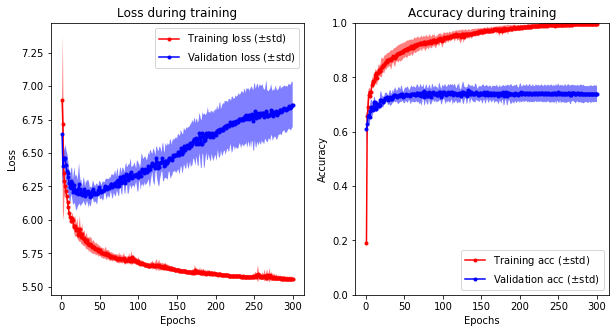

Epoch 132 has the highest validation accuracy (75.2 +- 2.6 %) with validation loss 6.406 +- 0.118. 
Epoch 36 has the lowest validation loss (6.174 +- 0.066) with accuracy 73.5 +- 2.1 %. 
Time taken to train (aprox): 1401.9 seconds.
Epoch 36 validation kappa: 0.639 +- 0.027.
The mean validation macro F1 score at epoch 36 is 63.9 +- 3.5000000000000004 %


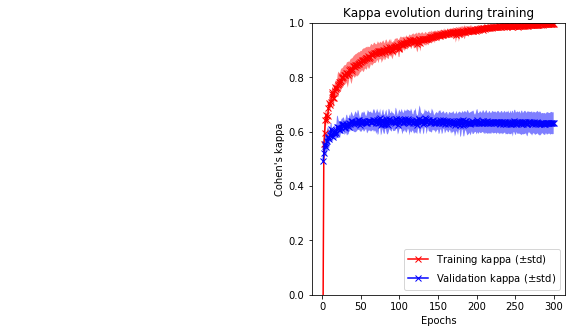

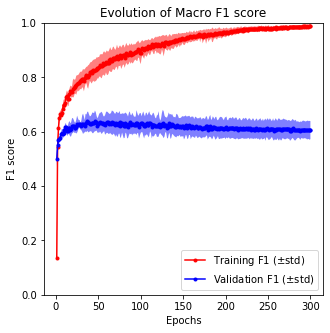

COMPUTE CORRELATION!!!


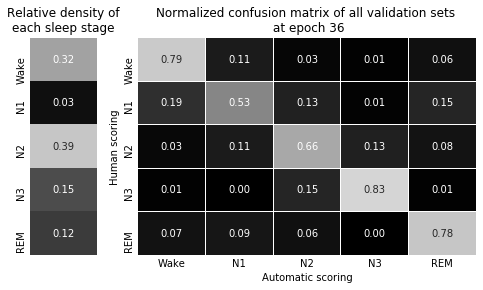

DONE!


In [27]:
epochs = 300
batch_size = 25

for k in range(d.K):
    print('##########################################################################################')
    print('          Starting fold %d' %k)
    print('##########################################################################################')
    mylstm.trainloop_persubject(d,k,epochs=epochs,subjects_per_batch=batch_size)
    mylstm.predict_all_validation_subjects(d,k)
mylstm.plot_training_information()
print('DONE!')

In [40]:
best_epoch = np.argmax(np.mean(np.asarray(mylstm.valid_macrof1),0))
print('Best F1 epoch: ', best_epoch)
print('Acc '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_acc_during_training)[:,best_epoch])))
print('Macro F1 '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_macrof1)[:,best_epoch])))
print('Kappa '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_kappa)[:,best_epoch])))

Best F1 epoch:  45
Acc 45: 	0.7400515626570853
Macro F1 45: 	0.6398773875667093
Kappa 45: 	0.643279000646473


In [42]:
best_epoch = 132
print('Best acc epoch: ', best_epoch)
print('Acc '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_acc_during_training)[:,best_epoch])))
print('Macro F1 '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_macrof1)[:,best_epoch])))
print('Kappa '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_kappa)[:,best_epoch])))

Best acc epoch:  132
Acc 132: 	0.7520451899268732
Macro F1 132: 	0.630313424202941
Kappa 132: 	0.6515024750650564


In [43]:
best_epoch = 36
print('Lowest loss epoch: ', best_epoch)
print('Acc '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_acc_during_training)[:,best_epoch])))
print('Macro F1 '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_macrof1)[:,best_epoch])))
print('Kappa '+str(best_epoch)+': \t'+str(np.mean(np.asarray(mylstm.valid_kappa)[:,best_epoch])))

Lowest loss epoch:  36
Acc 36: 	0.7349773952193401
Macro F1 36: 	0.6385536138391046
Kappa 36: 	0.6386331244871942


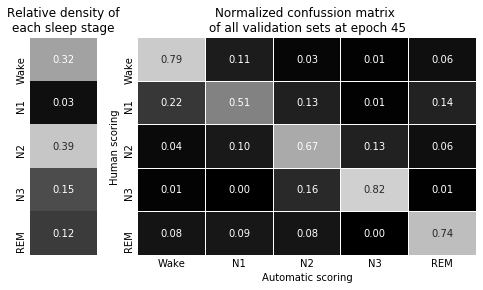

In [45]:
mylstm.plot_cm_at_epoch(45)

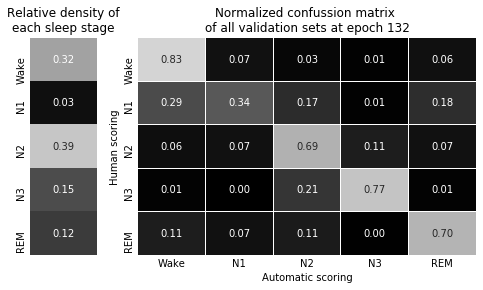

In [47]:
mylstm.plot_cm_at_epoch(132)